**Goal: To predict the price of diamonds based on their characteristics - compare models based on RMSE**

**Libraries**

In [1]:
# for operation
import pandas as pd
import numpy as np

# for modelling
import tools.models as mod
import h2o

# for visualization
import seaborn as sns
from matplotlib import pyplot as plt
import tools.visualization as vis

# mantra
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
sns.set_context('poster')
sns.set(rc={'figure.figsize': (4, 5)})
sns.set_style('whitegrid')

---

# Import clean datasets: with and without outliers

In [2]:
# importing clean dataset with and without the outliers
diamonds_w_outliers = pd.read_csv('../dataset/diamonds_with_outliers.csv', index_col = 'id')
diamonds_wo_outliers = pd.read_csv('../dataset/diamonds_without_outliers.csv', index_col = 'id')

In [4]:
# checking
diamonds_w_outliers.sample()

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
1716,0.92,2,5,2,62.10,58.00,6.15,6.22,3.84,8.43


In [5]:
print("Shape with outliers:", diamonds_w_outliers.shape, "|| Shape without outliers:", diamonds_wo_outliers.shape)
# more than 5k rows had outlier values and were removed

Shape with outliers: (40440, 10) || Shape without outliers: (35039, 10)


# Check ML models

- Compare lazypredict vs. AutoML vs. regular sklearn selection of models
- Compare with outliers vs. without outliers
- Compare with all features vs. without features that do not affect the price
- Include crossvalidation (can be automatically done by AutoML)
- Hyperparameter tuning, grid search (automatically done by AutoML)
- Normalization/standardization (automatically done by AutoML)

## Considering all features

### Lazy Predict (with outliers)

In [5]:
# lets first try lazypredict: doesn't consider hyperparameter tuning

# models_lp_with_outliers = mod.model_lazypredict(diamonds_w_outliers)
# print(models_lp_with_outliers)

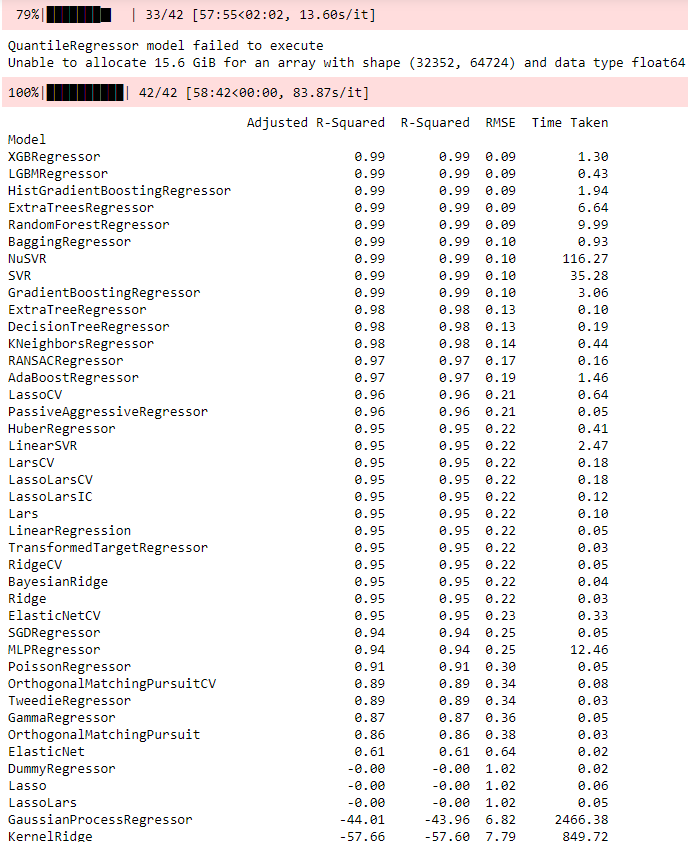

### Lazy Predict (without outliers)

In [6]:
# lets first try lazypredict: doesn't consider hyperparameter tuning

# models_lp_without_outliers = mod.model_lazypredict(diamonds_wo_outliers)
# print(models_lp_without_outliers)

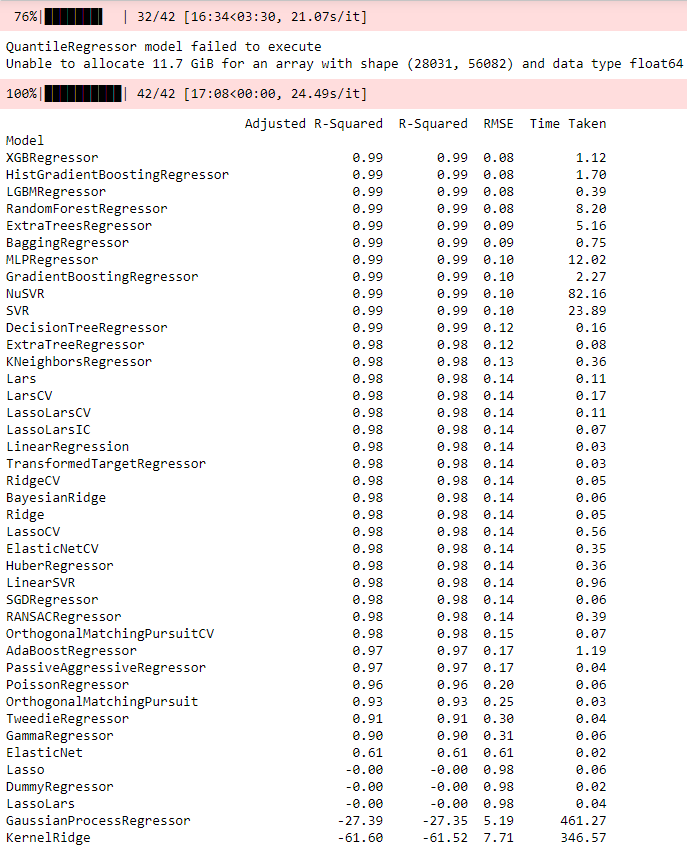

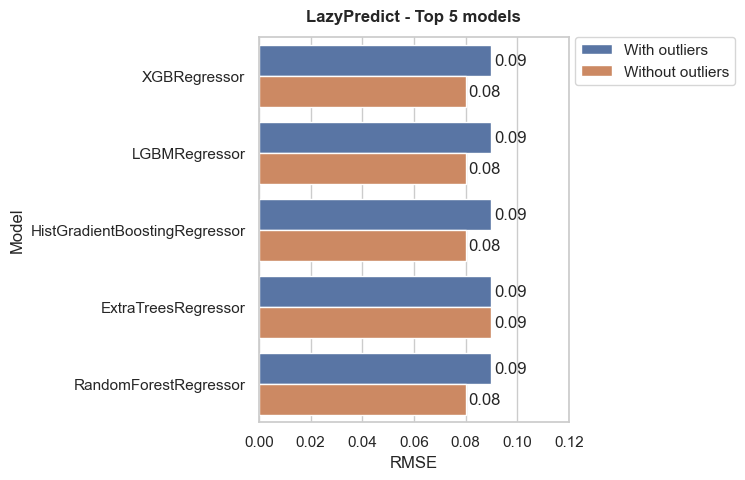

In [6]:
# Let's build a comparative figure

# dataframe lazypredict top5 models with outliers
lazy_with_outliers = {
    "Model" : ['XGBRegressor','LGBMRegressor','HistGradientBoostingRegressor','ExtraTreesRegressor','RandomForestRegressor'],
    "RMSE" : [0.09,0.09,0.09,0.09,0.09]
}

df_lazy_with_outliers = pd.DataFrame(lazy_with_outliers)
df_lazy_with_outliers["Condition"] = "With outliers"

# dataframe lazypredict top5 models without outliers
lazy_without_outliers = {
    "Model" : ['XGBRegressor','HistGradientBoostingRegressor','LGBMRegressor','RandomForestRegressor','ExtraTreesRegressor'],
    "RMSE" : [0.08,0.08,0.08,0.08,0.09]
}

df_lazy_without_outliers = pd.DataFrame(lazy_without_outliers)
df_lazy_without_outliers["Condition"] = "Without outliers"

# concat the dataframes
lazy_df = pd.concat([df_lazy_with_outliers,df_lazy_without_outliers], axis=0)

fig = vis.plot_model_RMSE(lazy_df, title="LazyPredict - Top 5 models")
plt.savefig('./output/lazypredict_top5.jpg', dpi=1000, bbox_inches='tight');

### h2o AutoML

#### With outliers

In [8]:
# start h2o

# import h2o
# from h2o.automl import H2OAutoML
# h2o.init()

In [11]:
# Load data into H2O
# automl_with_outliers = h2o.import_file('../dataset/diamonds_with_outliers.csv')

In [10]:
# train models
# aml_with_outliers = mod.model_automl(automl_with_outliers)

In [9]:
# show best models based on RMSE
# aml_with_outliers.leaderboard

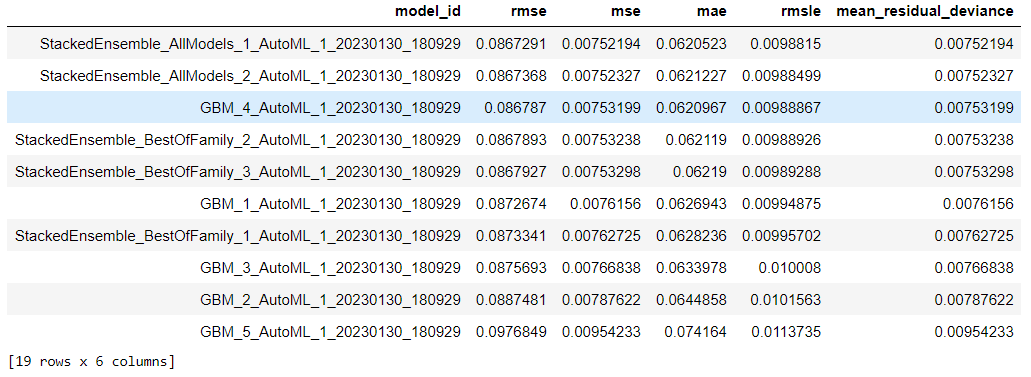

#### Without outliers

Restart kernel and re-initialize h2o before running the following code.

In [5]:
# start h2o

import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.361-b09, mixed mode)
  Starting server from C:\Users\mplan\anaconda3\envs\Ironhack\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\mplan\AppData\Local\Temp\tmp04s6kovz
  JVM stdout: C:\Users\mplan\AppData\Local\Temp\tmp04s6kovz\h2o_mplan_started_from_python.out
  JVM stderr: C:\Users\mplan\AppData\Local\Temp\tmp04s6kovz\h2o_mplan_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Europe/Paris
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.4
H2O_cluster_version_age:,25 days
H2O_cluster_name:,H2O_from_python_mplan_fl23zw
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.516 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [6]:
automl_without_outliers = h2o.import_file('../dataset/diamonds_without_outliers.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [7]:
aml_without_outliers = mod.model_automl(automl_without_outliers)

AutoML progress: |
18:19:18.5: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%


In [9]:
# aml_without_outliers.leaderboard

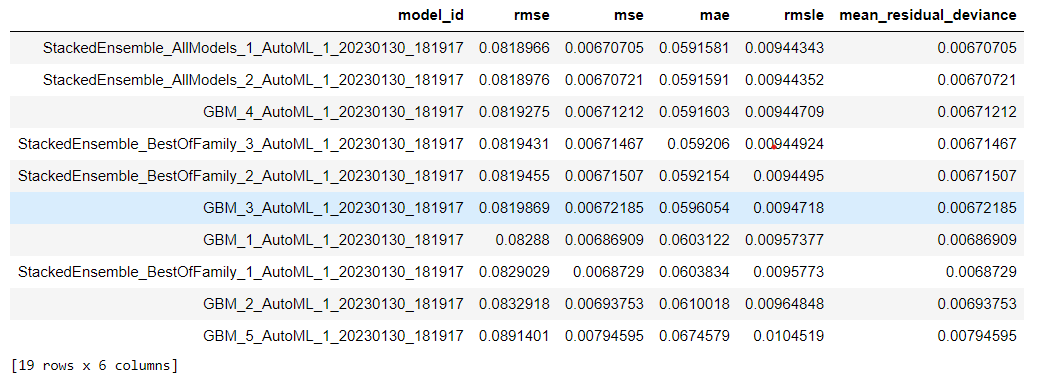

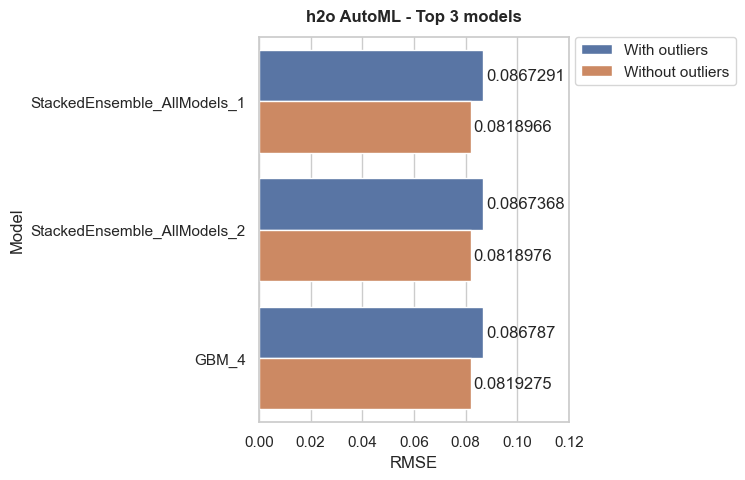

In [40]:
# Let's build a comparative figure

# dataframe automl top3 models with outliers
a_with_outliers = {
    "Model" : ['StackedEnsemble_AllModels_1', 'StackedEnsemble_AllModels_2', 'GBM_4'],
    "RMSE" : [0.0867291,0.0867368,0.086787]
}

df_aml_with_outliers = pd.DataFrame(a_with_outliers)
df_aml_with_outliers["Condition"] = "With outliers"

# dataframe automl top3 models with outliers
a_without_outliers = {
    "Model" : ['StackedEnsemble_AllModels_1', 'StackedEnsemble_AllModels_2', 'GBM_4'],
    "RMSE" : [0.0818966,0.0818976,0.0819275]
}

df_aml_without_outliers = pd.DataFrame(a_without_outliers)
df_aml_without_outliers["Condition"] = "Without outliers"

# concat the dataframes
aml_df = pd.concat([df_aml_with_outliers,df_aml_without_outliers], axis=0)

fig = vis.plot_model_RMSE(aml_df, title="h2o AutoML - Top 3 models")
plt.savefig('./output/aml_top3.jpg', dpi=1000, bbox_inches='tight');

**Conclusions**
- Overall, h2o AutoML is faster. On top of that, it performs CV and hyperparameter tuning.
- Without outliers returns lower RMSE models.

We can get a comparative explanation of the models:

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
DRF_1_AutoML_1_20230130_181917,0.0462154,0.00213587,0.0322676,0.00538455,0.00213587,1502,0.000898,DRF
StackedEnsemble_BestOfFamily_3_AutoML_1_20230130_181917,0.0620019,0.00384424,0.0446889,0.00712198,0.00384424,343,0.030504,StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_1_20230130_181917,0.0620105,0.0038453,0.0446975,0.00712299,0.0038453,367,0.006773,StackedEnsemble
GBM_4_AutoML_1_20230130_181917,0.0621473,0.00386229,0.0447703,0.00713869,0.00386229,1263,0.005472,GBM
StackedEnsemble_AllModels_1_AutoML_1_20230130_181917,0.0622083,0.00386987,0.0448247,0.00714537,0.00386987,571,0.022606,StackedEnsemble
StackedEnsemble_AllModels_2_AutoML_1_20230130_181917,0.0622083,0.00386987,0.0448247,0.00714537,0.00386987,527,0.02329,StackedEnsemble
XRT_1_AutoML_1_20230130_181917,0.0634558,0.00402664,0.0446909,0.00741556,0.00402664,678,0.000503,DRF
GBM_3_AutoML_1_20230130_181917,0.071096,0.00505465,0.0517556,0.00817641,0.00505465,1059,0.005497,GBM
GBM_1_AutoML_1_20230130_181917,0.0730297,0.00533333,0.0530358,0.00843205,0.00533333,2366,0.010697,GBM
StackedEnsemble_BestOfFamily_1_AutoML_1_20230130_181917,0.073077,0.00534025,0.0531047,0.008438,0.00534025,588,0.011473,StackedEnsemble


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

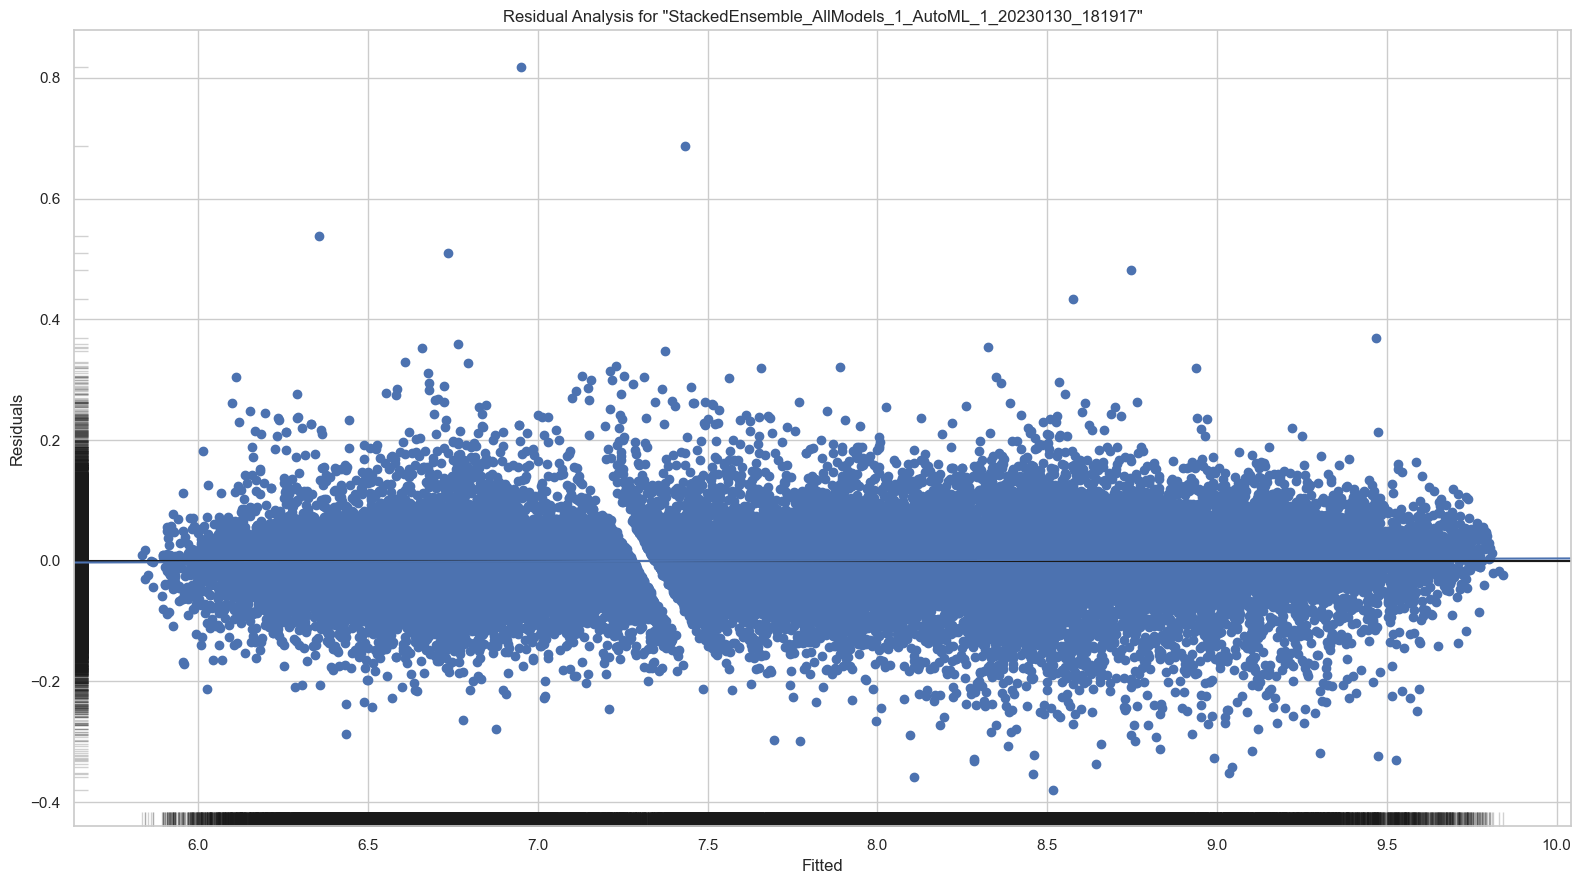

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

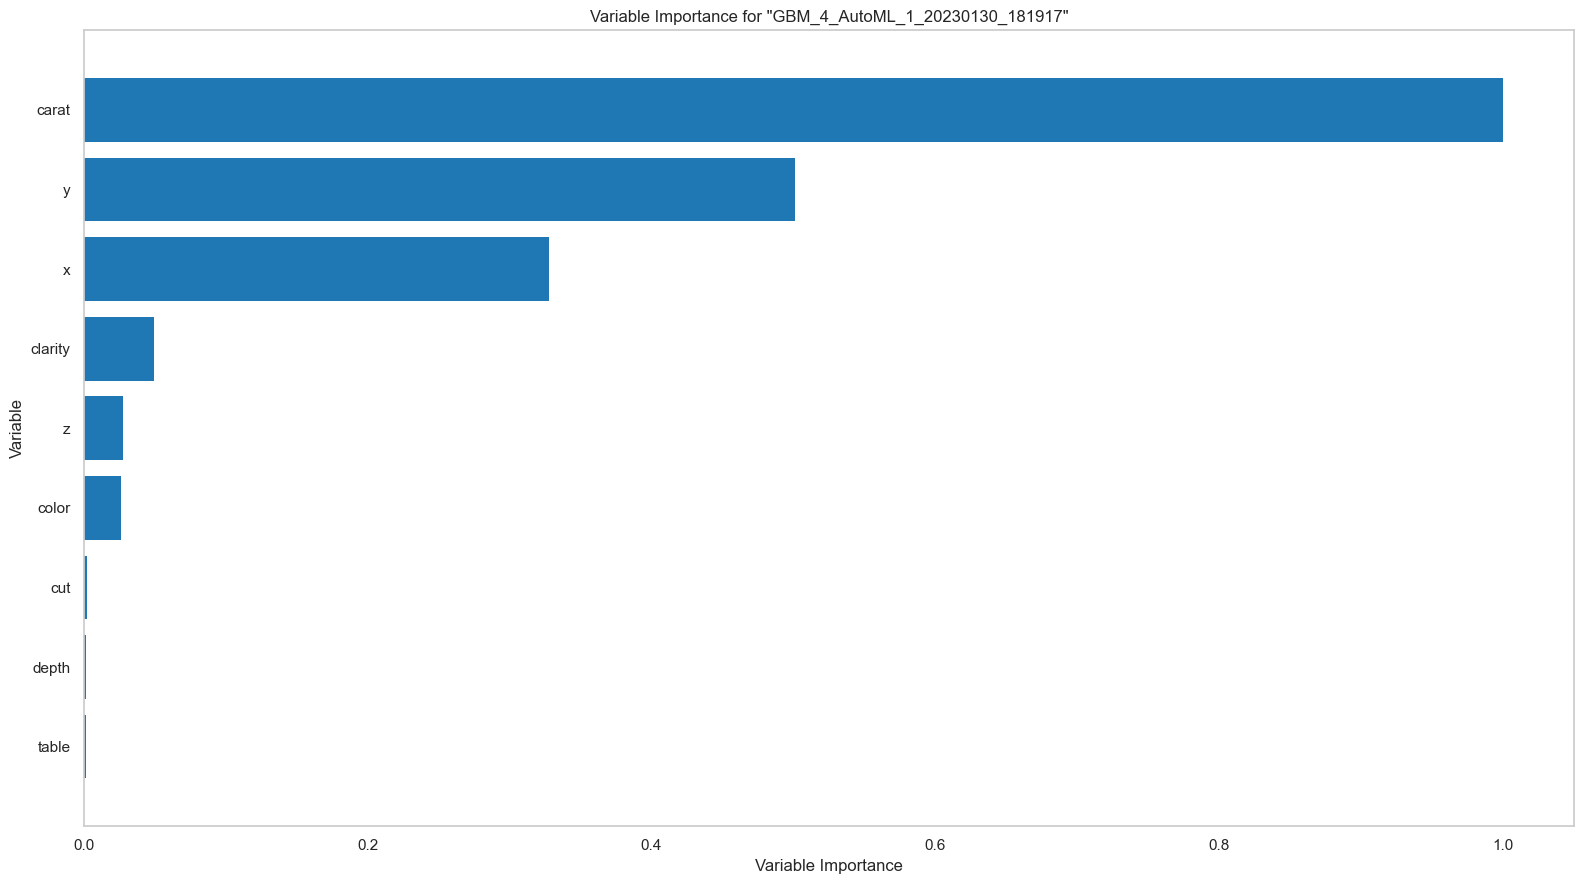

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

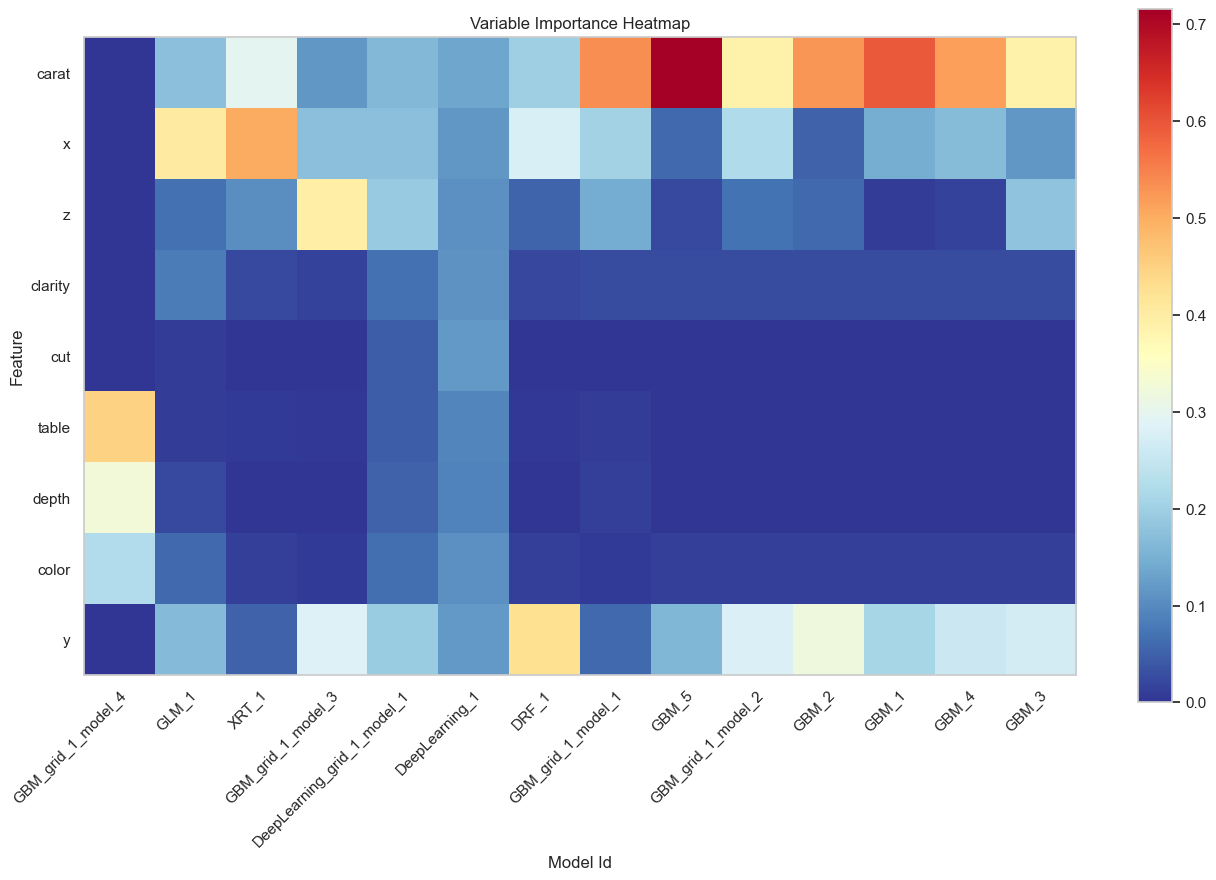

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

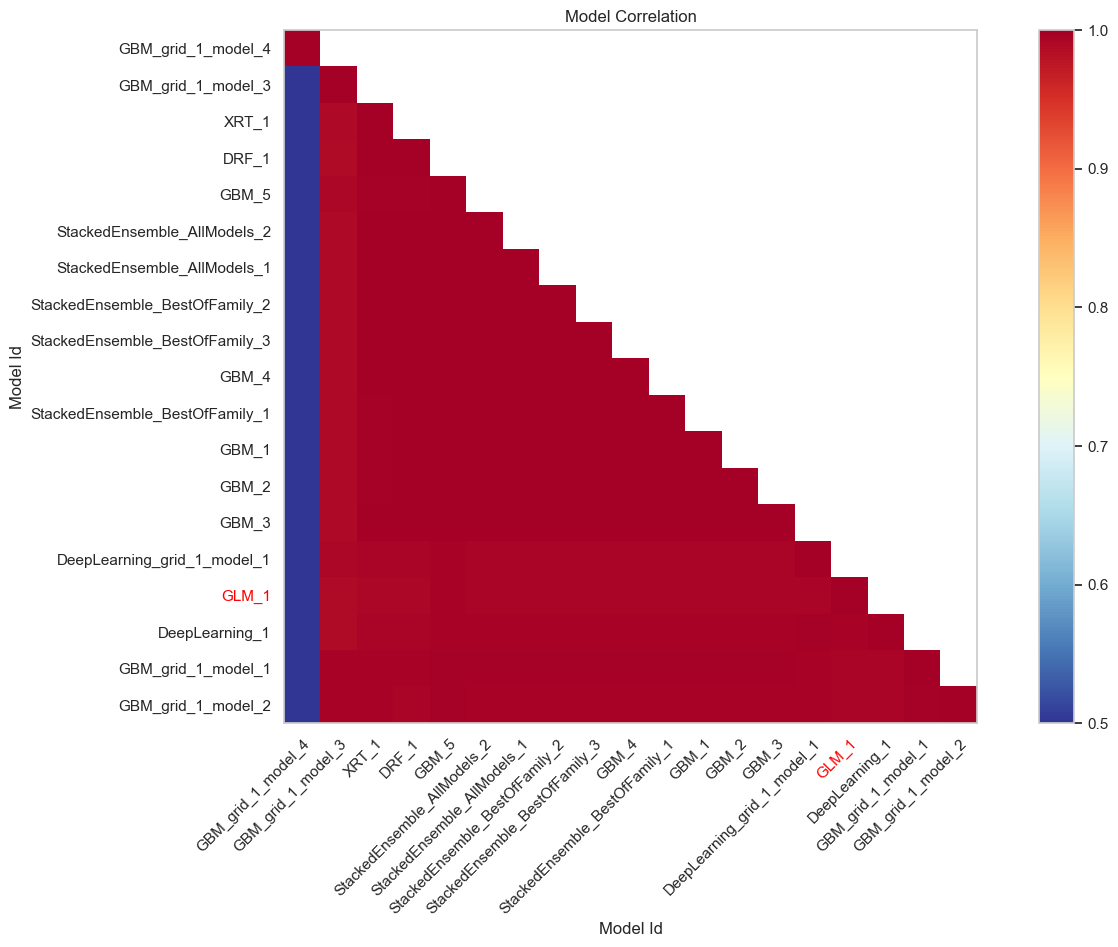

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

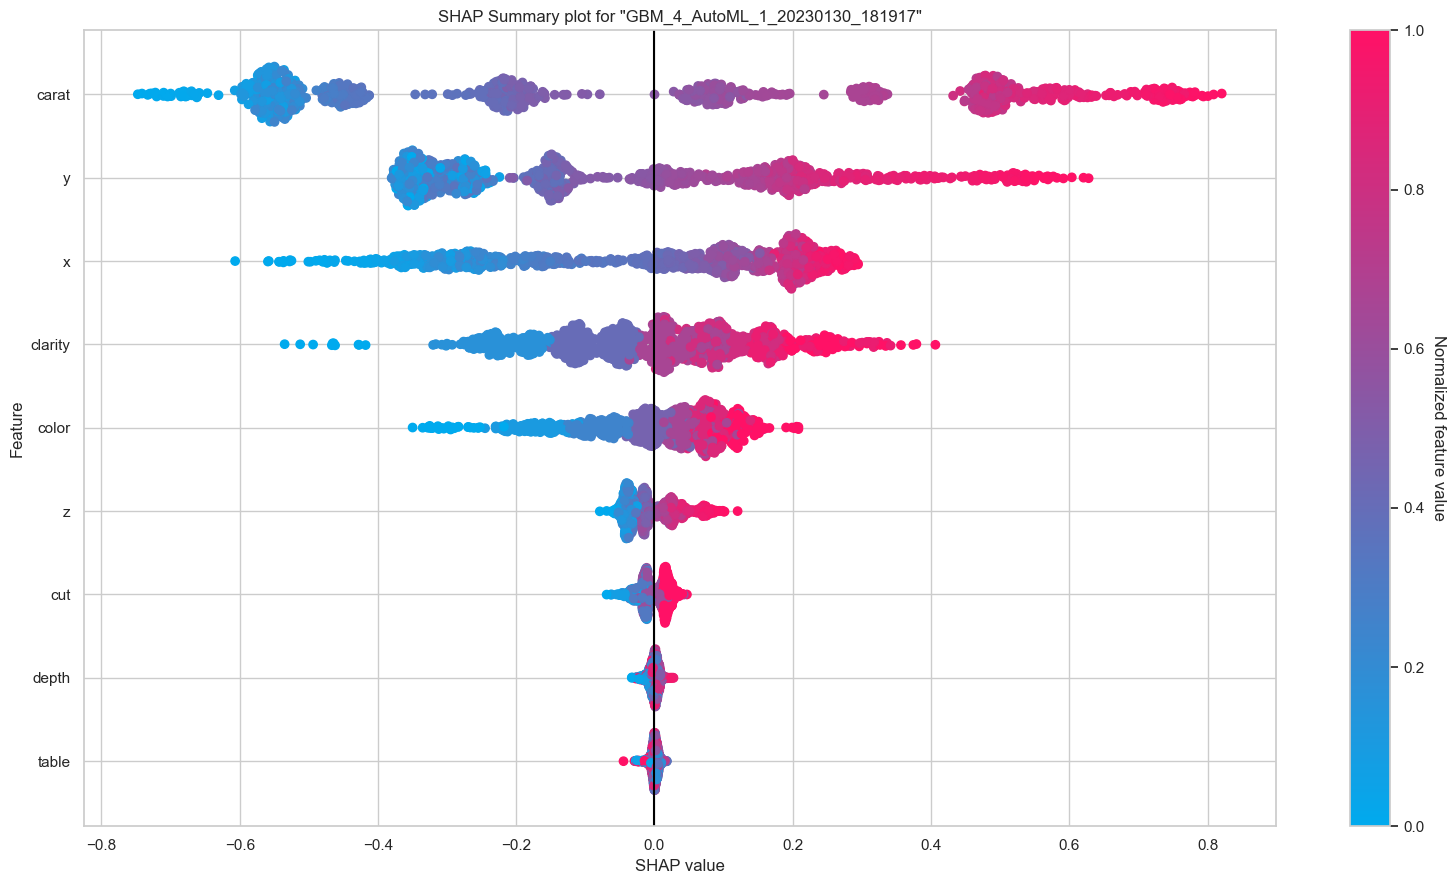

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

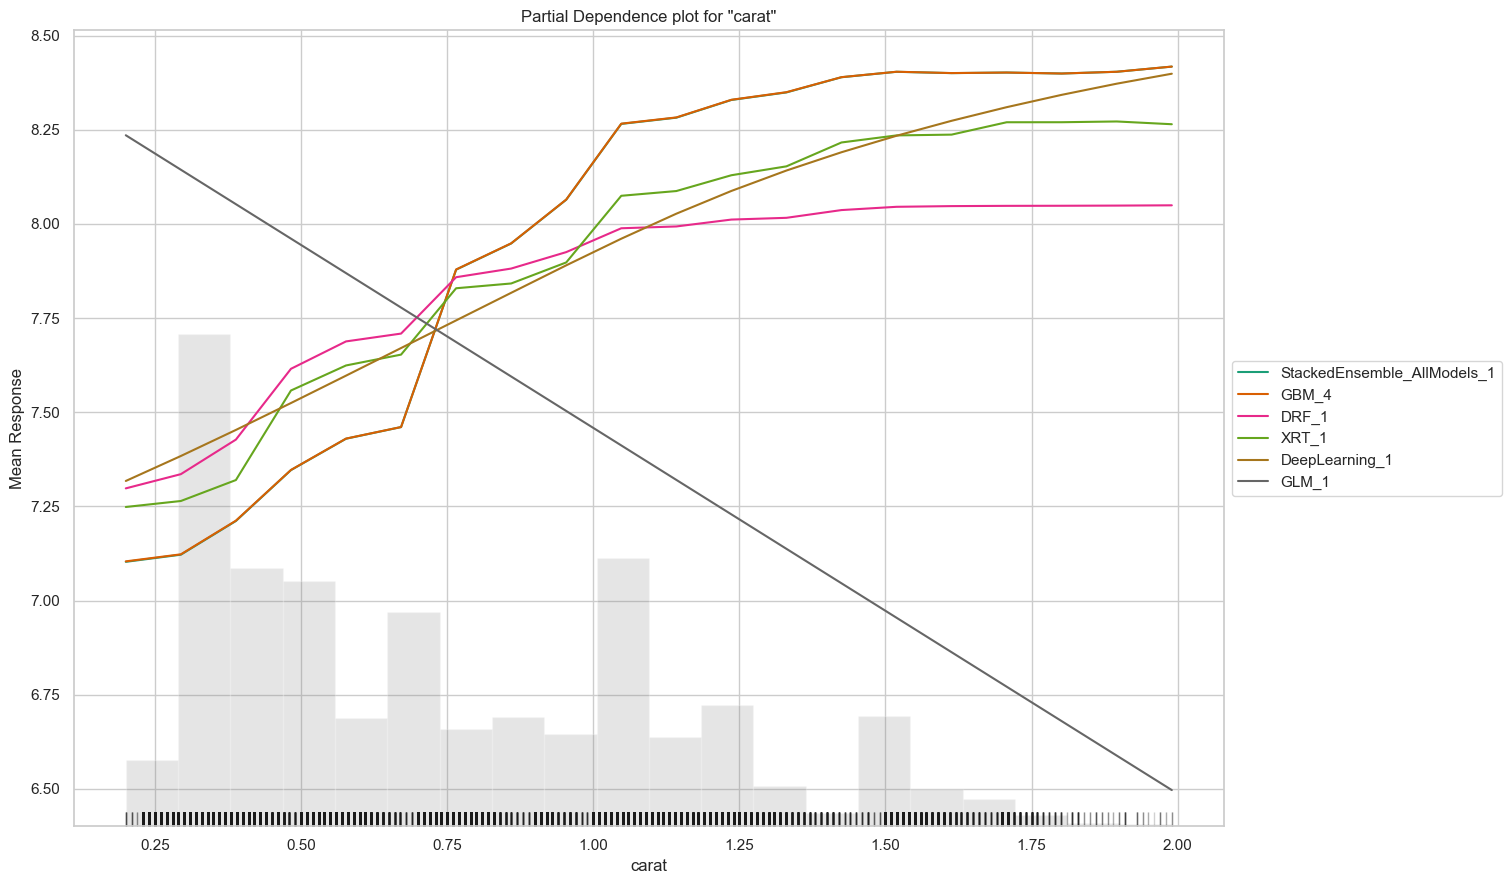

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

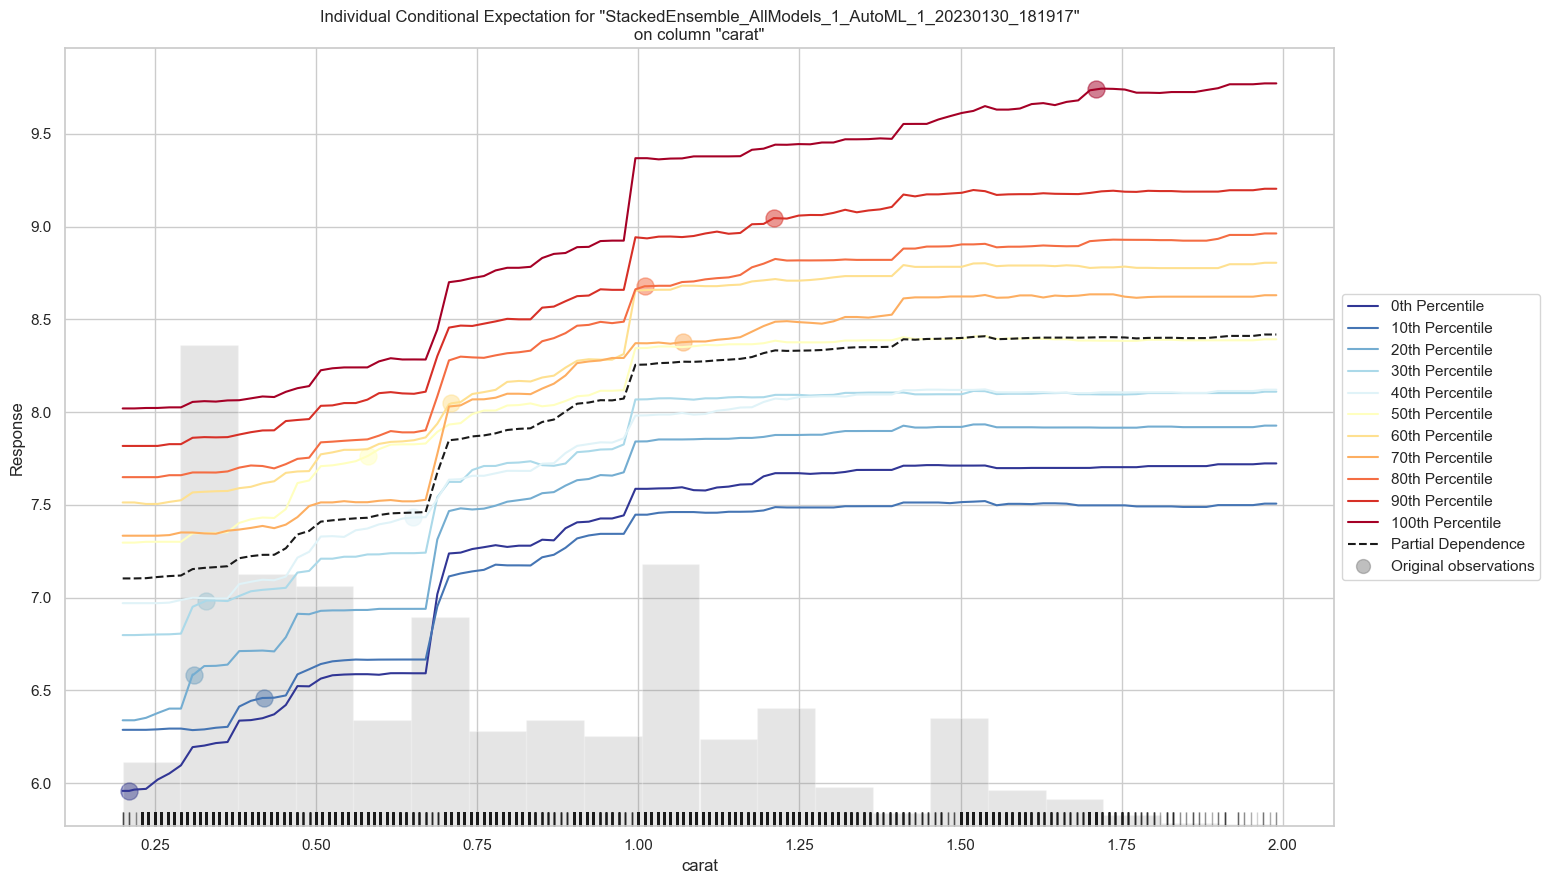

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
DRF_1_AutoML_1_20230130_181917,0.0462154,0.00213587,0.0322676,0.00538455,0.00213587,1502,0.000898,DRF
StackedEnsemble_BestOfFamily_3_AutoML_1_20230130_181917,0.0620019,0.00384424,0.0446889,0.00712198,0.00384424,343,0.030504,StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_1_20230130_181917,0.0620105,0.0038453,0.0446975,0.00712299,0.0038453,367,0.006773,StackedEnsemble
GBM_4_AutoML_1_20230130_181917,0.0621473,0.00386229,0.0447703,0.00713869,0.00386229,1263,0.005472,GBM
StackedEnsemble_AllModels_1_AutoML_1_20230130_181917,0.0622083,0.00386987,0.0448247,0.00714537,0.00386987,571,0.022606,StackedEnsemble
StackedEnsemble_AllModels_2_AutoML_1_20230130_181917,0.0622083,0.00386987,0.0448247,0.00714537,0.00386987,527,0.02329,StackedEnsemble
XRT_1_AutoML_1_20230130_181917,0.0634558,0.00402664,0.0446909,0.00741556,0.00402664,678,0.000503,DRF
GBM_3_AutoML_1_20230130_181917,0.071096,0.00505465,0.0517556,0.00817641,0.00505465,1059,0.005497,GBM
GBM_1_AutoML_1_20230130_181917,0.0730297,0.00533333,0.0530358,0.00843205,0.00533333,2366,0.010697,GBM
StackedEnsemble_BestOfFamily_1_AutoML_1_20230130_181917,0.073077,0.00534025,0.0531047,0.008438,0.00534025,588,0.011473,StackedEnsemble


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

In [48]:
aml_without_outliers.explain(frame=automl_without_outliers, top_n_features=1)

#### Getting the best model from autoML

In [41]:
# get the best model
best_model = aml_without_outliers.leader

In [53]:
best_model

,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,0.0591577,0.0001164,0.0592450,0.0590019,0.0592891,0.0591655,0.0590869
mean_residual_deviance,0.0067071,0.0001931,0.0070407,0.0066022,0.0067101,0.0065877,0.0065948
mse,0.0067071,0.0001931,0.0070407,0.0066022,0.0067101,0.0065877,0.0065948
null_deviance,6641.482,89.364426,6514.9204,6646.7812,6694.406,6749.0063,6602.295
r2,0.9929191,0.0002800,0.9924520,0.9930727,0.9928834,0.9931626,0.9930249
residual_deviance,47.001667,1.380608,49.150818,46.044075,47.64141,46.12043,46.0516
rmse,0.0818902,0.0011694,0.0839086,0.0812542,0.0819150,0.0811646,0.0812085
rmsle,0.0094428,0.0001227,0.0096488,0.0093946,0.0094591,0.0093574,0.0093540


We can check the parameters of the model:

In [46]:
# best_model.params

Let's save it:

In [54]:
# save the model
h2o.save_model(model = best_model, path ='./models/', force = True)

'C:\\Users\\mplan\\Ironhack\\Bootcamp\\project-5\\project-5\\src\\models\\StackedEnsemble_AllModels_1_AutoML_1_20230130_181917'

#### Making predictions with the StackedEnsemble model

In [69]:
pred = best_model.predict(automl_without_outliers.drop('price',axis=1))
pred

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


predict
8.8323
6.53497
6.80356
6.87051
9.73555
9.37857
8.24207
8.555
6.72719
8.09041


In [72]:
automl_without_outliers['price']

price
8.928
6.477
6.81
6.824
9.776
9.316
8.292
8.568
6.75
8.081


### Scikit-leat models - *manually*

**Feature scaling**

*from https://datascience.stackexchange.com/*

For some machine learning methods it is recommended to use feature normalization to use features that are on the same scale, especially for distance based methods like k-means or when using regularization.

However, decision trees do not require normalization of their inputs; and since XGBoost is essentially an ensemble algorithm comprised of decision trees, it does not require normalization for the inputs either.

Nonetheless, it's always a good idea to normalize your features because:

- It's easier to visualize and interpret your model
- It's easier to compare another model (e.g. SVM) with the same data set

#### With outliers

In [12]:
with_outliers = mod.model_sklearn(df = diamonds_w_outliers, condition = "With outliers",
                                 X_split = ["carat", "cut", "color", "clarity", "depth", "table", "x", "y", "z"],
                                  y_split = ["price"])

In [13]:
with_outliers

,Model,RMSE,Condition
0,GBM,0.11,With outliers
1,RF,0.09,With outliers
2,XGB,0.09,With outliers


#### Without outliers

In [13]:
without_outliers = mod.model_sklearn(df = diamonds_wo_outliers, condition = "Without outliers",
                                    X_split = ["carat", "cut", "color", "clarity", "depth", "table", "x", "y", "z"],
                                    y_split = ["price"])

In [14]:
without_outliers

,Model,RMSE,Condition
0,GBM,0.10,Without outliers
1,RF,0.09,Without outliers
2,XGB,0.08,Without outliers


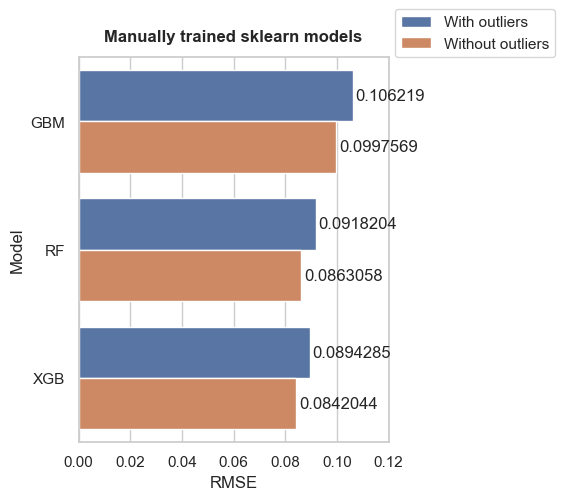

In [15]:
# concat the dataframes
sk_df = pd.concat([with_outliers,without_outliers], axis=0)

fig = vis.plot_model_RMSE(sk_df, title="Manually trained sklearn models")
plt.legend(bbox_to_anchor=(1.02, 1), loc='lower left', borderaxespad=0)
plt.savefig('./output/sklearn_models.jpg', dpi=1000, bbox_inches='tight');

## Feature selection

- Let's use XGBoost and see whether we can identify those features that shouldn't impact the price.
- They should be, as detected by h2o AutoML: table, depth, cut, z
- XGBoost was ranked the top model by lazypredict. But it didn't do any hyperparameter tuning, so we might be able to improve it through parameter grid search.

In [9]:
import xgboost as xgb
from sklearn.model_selection import train_test_split as tts
from sklearn.feature_selection import RFE

In [14]:
# initialize model
XGB = xgb.XGBRegressor()

In [15]:
# Split target
X = diamonds_wo_outliers[["carat", "cut", "color", "clarity", "depth", "table", "x", "y", "z"]]
y = diamonds_wo_outliers[["price"]]

# Train-test split
X_train, X_test, y_train, y_test = tts (X, y, test_size = 0.2)
model = XGB.fit(X_train,y_train)

In [16]:
selector = RFE(model, step=1, n_features_to_select=5) # recursive feature elimination, let's keep the 5 best

In [17]:
selector.fit(X_train, y_train)

RFE(estimator=XGBRegressor(base_score=None, booster=None, callbacks=None,
                           colsample_bylevel=None, colsample_bynode=None,
                           colsample_bytree=None, early_stopping_rounds=None,
                           enable_categorical=False, eval_metric=None,
                           feature_types=None, gamma=None, gpu_id=None,
                           grow_policy=None, importance_type=None,
                           interaction_constraints=None, learning_rate=None,
                           max_bin=None, max_cat_threshold=None,
                           max_cat_to_onehot=None, max_delta_step=None,
                           max_depth=None, max_leaves=None,
                           min_child_weight=None, missing=nan,
                           monotone_constraints=None, n_estimators=100,
                           n_jobs=None, num_parallel_tree=None, predictor=None,
                           random_state=None, ...),
    n_features_to_selec

In [18]:
selector.ranking_

array([1, 3, 1, 1, 4, 5, 1, 1, 2])

In [20]:
X_train.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

- Thus, features to keep would be: carat, color, clarity, x, y.
- And those that contribute less to the price are: table, depth, cut and z. As reported by h2o AutoML

## Considering selected features only

In [7]:
new_models = mod.model_sklearn(df = diamonds_wo_outliers, 
                               condition = "Without outliers & selected features",
                              X_split = ["carat", "color", "clarity", "x", "y"],
                              y_split = ["price"])

In [8]:
new_models # without outliers

,Model,RMSE,Condition
0,GBM,0.10,Without outliers & selected features
1,RF,0.09,Without outliers & selected features
2,XGB,0.09,Without outliers & selected features


In [9]:
new_models_w_outliers = mod.model_sklearn(df = diamonds_w_outliers, 
                               condition = "With outliers & selected features",
                              X_split = ["carat", "color", "clarity", "x", "y"],
                              y_split = ["price"])

In [10]:
new_models_w_outliers

,Model,RMSE,Condition
0,GBM,0.11,With outliers & selected features
1,RF,0.10,With outliers & selected features
2,XGB,0.09,With outliers & selected features


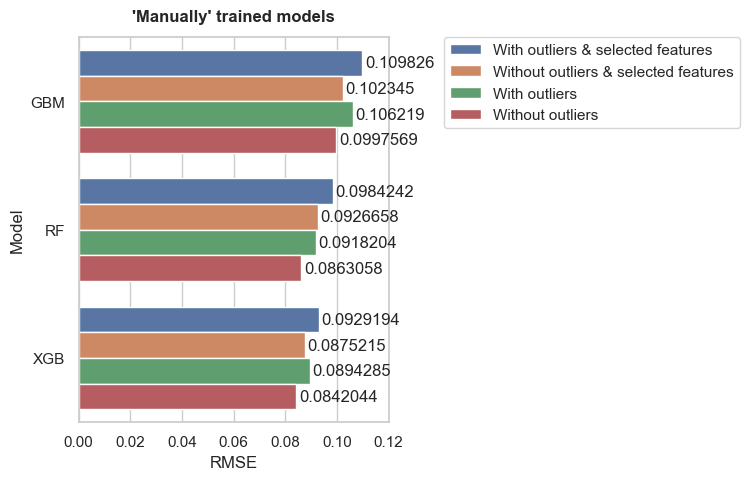

In [28]:
new_df = pd.concat([new_models_w_outliers,new_models, with_outliers,without_outliers], axis=0)

fig = vis.plot_model_RMSE(new_df, title="'Manually' trained models")
plt.legend(bbox_to_anchor=(1.18, 1), loc='upper left', borderaxespad=0)
fig.bar_label(fig.containers[2], padding = 2)
fig.bar_label(fig.containers[3], padding = 2)
plt.savefig('./output/sklearn_models_feature_selection.jpg', dpi=1000, bbox_inches='tight');

**Conclusions:**
- It looks like XGB is performing the best out of the three.
- And the best condition is: without outliers but keeping all features.

## Hyerparameter tuning

This are the parameter tuned by h2o AutoML XGBoost:

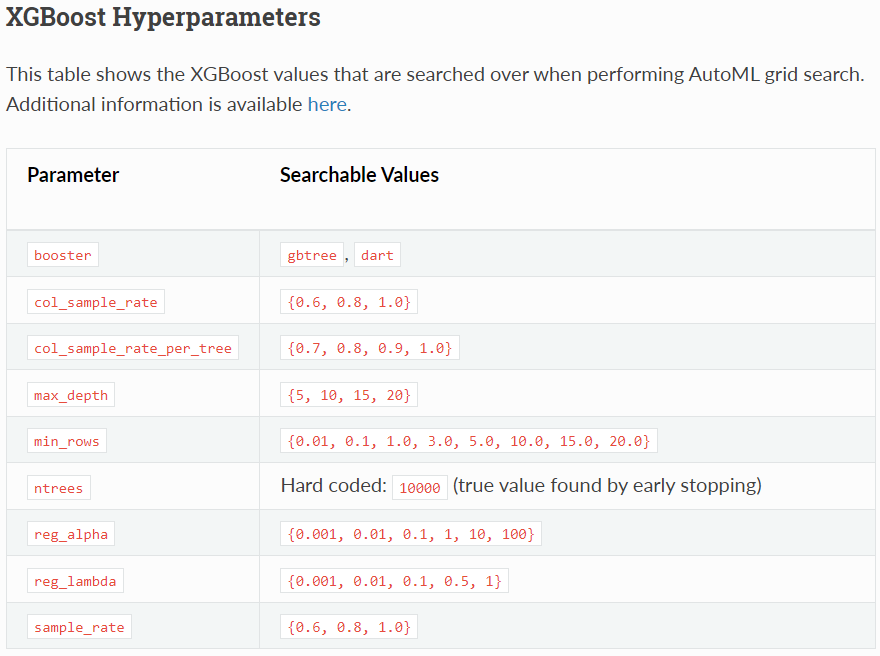

In [12]:
# initialize
tuned_XGB = xgb.XGBRegressor()

# Split target
X = diamonds_wo_outliers[["carat", "cut", "color", "clarity", "depth", "table", "x", "y", "z"]]
y = diamonds_wo_outliers[["price"]]

# Train-test split
X_train, X_test, y_train, y_test = tts (X, y, test_size = 0.2)

tuned_model = tuned_XGB.fit(X_train,y_train)

In [13]:
# try different ones from AutoML
parameters = {
    "learning_rate":(0.05, 0.10, 0.15),
    "max_depth":[3, 4, 5, 6, 8],
    "min_child_weight":[1, 3, 5, 7],
    "gamma":[0.0, 0.1, 0.2],
    "colsample_bytree":[0.3, 0.4]
    }

In [14]:
from sklearn.model_selection import GridSearchCV

# perform the grid search with the defined parameters
gs = GridSearchCV(
    estimator = tuned_model, 
    param_grid = parameters,
    cv = 5,
    scoring = "neg_mean_squared_error")

# fitting the model
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=Non

In [18]:
from sklearn import metrics

# make predictions from test data
y_pred = gs.predict(X_test)
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("r2:", metrics.r2_score(y_test, y_pred))

RMSE: 0.08735571400715794
r2: 0.9918279096620909


- RMSE: 0.0873557
- We've not been able to significantly improve the model with the specified grid search.